# Project Results

Hello! This notebook has code that loads the saved q-table and prints on the terminal. You can use this notebook to check the best trained agent's q-value here. Training process on cloud continues, so time to time I will commit better policy file if comes-up.

In [1]:
import numpy as np
import pickle

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

_sign = lambda x: x and (1, -1)[x<0]

d = np.zeros((22,11,2))
for state,alist in q_table.items():
    if(state[0] > 21):
        continue
    if(state[1] > 10):
        continue
    d[state[0]][state[1]][0] = alist[0]
    d[state[0]][state[1]][1] = alist[1]

print("---------------------------------------------------------------------------------------------------------------------------")
print("  |     1     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |")
for i in range(1,22):
    print("%02d|"%i, end="")
    for j in range(1,11):
        if _sign(d[i][j][0]) == 1:
            print("\x1b[1;32;40m%05.2f\x1b[0m"%d[i][j][0],end="|")
        if _sign(d[i][j][0]) == -1:
            print("\x1b[1;31;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="|")
        if _sign(d[i][j][1]) == 1:
            print("\x1b[6;32;47m%05.2f\x1b[0m"%d[i][j][1],end="|")
        if _sign(d[i][j][1]) == -1:
            print("\x1b[6;31;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")
        if(d[i][j][0] == 0):
            print("\x1b[1;31;40m%05.2f\x1b[0m"%abs(d[i][j][0]),end="|")
        if(d[i][j][1] == 0):
            print("\x1b[6;31;47m%05.2f\x1b[0m"%abs(d[i][j][1]),end="|")

    print("")
print("---------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------
  |     1     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |    10     |
01|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|00.00|
02|00.01|00.56|00.01|00.57|00.01|00.53|00.01|00.54|00.01|00.60|00.01|00.64|00.01|00.71|00.01|00.77|00.01|00.68|00.01|00.47|
03|00.01|00.53|00.01|00.55|00.01|00.48|00.01|00.52|00.01|00.59|00.01|00.61|00.01|00.64|00.01|00.71|00.02|00.63|00.01|00.44|
04|00.01|00.46|00.01|00.51|00.02|00.46|00.01|00.46|00.01|00.57|00.01|00.54|00.01|00.57|00.01|00.68|00.03|00.57|00.02|00.40|
05|00.03|00.41|00.01|00.48|00.03|00.42|00.02|00.42|00.02|00.53|00.01|00.48|00.01|00.52|00.01|00.60|00.04|00.52|00.03|00.37|
06|00.03|00.35|00.02|00.44|00.05|00.35|00.03|00.36|00.03|00.47|00.02|00.44|00.02|00.45|00.02|00.60|00.06|00.40|00.05|00.32|
07|00.05

### Same Results with Matplotlib

You can view the same results below. I hoping to show the result with better graphics using matplotlib library.

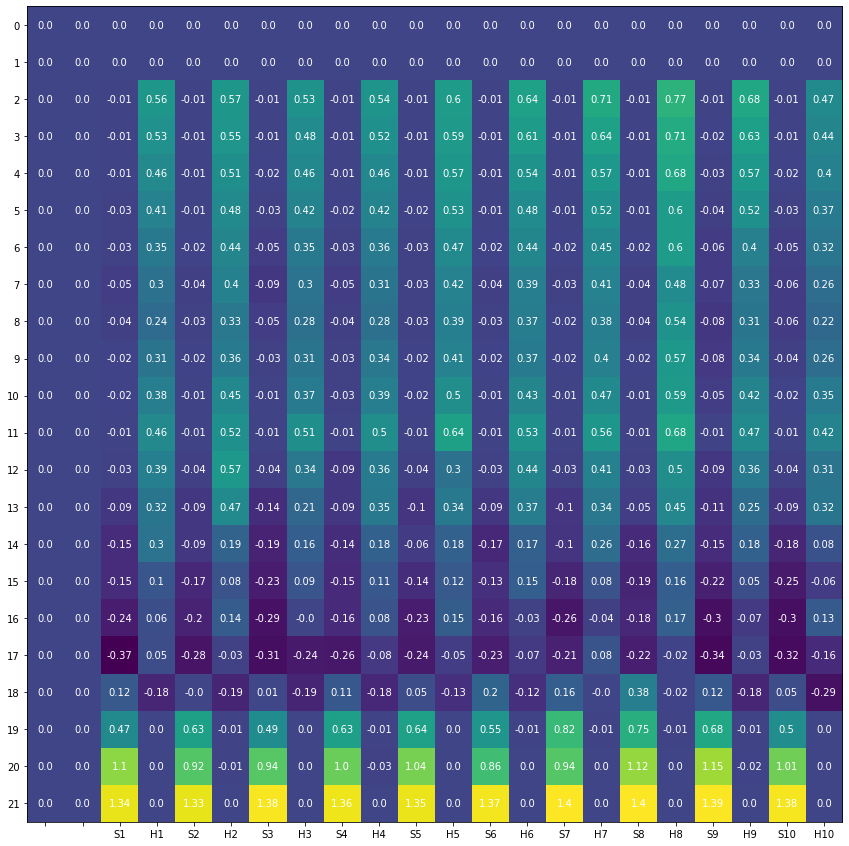

In [2]:
import numpy as np
import pickle

fr = open('policy', 'rb')
q_table = pickle.load(fr)
fr.close()        

d1 = np.zeros((22,11))
d2 = np.zeros((22,11))
d3 = np.zeros((22,22))
for state,alist in q_table.items():
    if(state[0] > 21 or state[1] > 10):
        continue
    d1[state[0]][state[1]] = alist[0]
    d2[state[0]][state[1]] = alist[1]
    d3[state[0]][state[1]*2] = alist[0]
    d3[state[0]][state[1]*2+1] = alist[1]

import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(figsize=(30,15))
im1 = ax1.imshow(d3)

# We want to show all ticks...
ax1.set_xticks(np.arange(22))######
ax1.set_yticks(np.arange(22))

ax1.set_xticklabels(["","","S1","H1","S2","H2","S3","H3","S4","H4","S5","H5","S6","H6","S7","H7","S8","H8","S9","H9","S10","H10"])

for i in range(len(d3)):
    for j in range(len(d3[i])):
        text = ax1.text(j, i, round(d3[i, j],2),
                       ha="center", va="center", color="w")

plt.show()